In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import lognorm
import statsmodels.api as sm
import dataframe_image as dfi
import math
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from scipy.stats import f_oneway


In [29]:
def make_plots_of_frame_data(df):
    ax = sns.displot(data = df, x = "Angle", hue = "Source", kind="kde", legend=True)
    sns.move_legend(ax, "center")
    plt.title("Angle at division (k frames) apart)")
    plt.xlabel("Angle")
    plt.tight_layout()
    plt.savefig("density_of_angles_at_division_all_frame_diff.png", dpi=200)
    return


def frame_diff_plotting():

    df_frame_diff_1 = pd.read_csv('angles_for_frame_diff_1.csv')
    df_gaussian = df_frame_diff_1[df_frame_diff_1.Source == "Gaussian_Sim"]

    df_frame_diff_1.replace('Real', 'Frame Diff = 1', inplace=True)
    df_frame_diff_1 = df_frame_diff_1[df_frame_diff_1.Source != "Gaussian_Sim"]


    df_frame_diff_5 = pd.read_csv('angles_for_frame_diff_5.csv')
    df_frame_diff_5 = df_frame_diff_5[df_frame_diff_5.Source != "Gaussian_Sim"]
    df_frame_diff_5.replace('Real', 'Frame Diff = 5', inplace=True)


    df_frame_diff_10 = pd.read_csv('angles_for_frame_diff_10.csv')
    df_frame_diff_10 = df_frame_diff_10[df_frame_diff_10.Source != "Gaussian_Sim"]
    df_frame_diff_10.replace('Real', 'Frame Diff = 10', inplace=True)


    df_frame_diff_20 = pd.read_csv('angles_for_frame_diff_20.csv')
    df_frame_diff_20 = df_frame_diff_20[df_frame_diff_20.Source != "Gaussian_Sim"]
    df_frame_diff_20.replace('Real', 'Frame Diff = 20', inplace=True)


    df_frame_diff_50 = pd.read_csv('angles_for_frame_diff_50.csv')
    df_frame_diff_50 = df_frame_diff_50[df_frame_diff_50.Source != "Gaussian_Sim"]
    df_frame_diff_50.replace('Real', 'Frame Diff = 50', inplace=True)

    n = len(df_frame_diff_1) - len(df_frame_diff_50)
    df_gaussian.drop(df_gaussian.tail(n).index, inplace = True)


    df_all_frame_diff_vals = pd.concat([df_frame_diff_1, df_frame_diff_5, df_frame_diff_10, df_frame_diff_20, df_frame_diff_50, df_gaussian], ignore_index=True)
    df_all_frame_diff_vals.to_csv('angles_for_all_frame_diff_combined.csv', index=False)
    make_plots_of_frame_data(df_all_frame_diff_vals)

    return


In [3]:
def calculate_brlen_error(df, normalize='MAPE'):
    # remove the rows that correspond to 0 branch length
    error = "error"
    df = df[df.trueBrlen != 0]
    true_branch_lengths = df.trueBrlen
    est_branch_lengths = df.estBrlen 
    if normalize=='MAPE':
        return mean_absolute_percentage_error(true_branch_lengths, est_branch_lengths)
    elif normalize=='MAE':
        return mean_absolute_error(true_branch_lengths, est_branch_lengths)
    elif normalize=='RMSE':
        return math.sqrt( mean_squared_error(true_branch_lengths, est_branch_lengths) )
    return error

In [94]:
def plot_simulated_seq_simulated_location_data(df, name_save_prefix):
    data_names = ['problin', 'sigma05_spalin', 'sigma15_spalin', 'sigma3_spalin',
                'sigma05_spalin_spatialonly', 'sigma15_spalin_spatialonly', 'sigma3_spalin_spatialonly',
                'sep05_spalin', 'sep1_spalin', 'sep2_spalin',
                'sep05_spalin_spatialonly', 'sep1_spalin_spatialonly', 'sep2_spalin_spatialonly']
    
    # k10 data
    k10_df = df[df['character']=='k10_']
    error_data_frame_k10 = pd.DataFrame(columns=['experiment', 'method', 'RMSE', 'MAPE', 'MAE'])
    k50_df = df[df['character']=='k50_']
    error_data_frame_k50 = pd.DataFrame(columns=['experiment', 'method', 'RMSE', 'MAPE', 'MAE'])
    k200_df = df[df['character']=='k200_']
    error_data_frame_k200 = pd.DataFrame(columns=['experiment', 'method', 'RMSE', 'MAPE', 'MAE'])
    


    for method in data_names:
        for experiment in set(k10_df['experiment'].values):
            one_experiment_one_setting_df = k10_df[(k10_df['experiment'] == experiment) & (k10_df['method'] == method)]
            if one_experiment_one_setting_df.empty == False:
                if ("b\'virtual\'" in one_experiment_one_setting_df.values) == True:
                    pass	
                else:
                    MAPE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "MAPE")
                    RMSE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "RMSE")
                    MAE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "MAE")

                    temp_df = {'experiment': experiment, 'method': method, 'MAPE': MAPE, "RMSE": RMSE, 'MAE': MAE}
                    error_data_frame_k10 = error_data_frame_k10.append(temp_df,ignore_index = True)	

    for method in data_names:
        for experiment in set(k50_df['experiment'].values):
            one_experiment_one_setting_df = k50_df[(k50_df['experiment'] == experiment) & (k50_df['method'] == method)]
            if one_experiment_one_setting_df.empty == False:
                if ("b\'virtual\'" in one_experiment_one_setting_df.values) == True:
                    pass	
                else:
                    MAPE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "MAPE")
                    RMSE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "RMSE")
                    MAE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "MAE")

                    temp_df = {'experiment': experiment, 'method': method, 'MAPE': MAPE, "RMSE": RMSE, 'MAE': MAE}
                    error_data_frame_k50 = error_data_frame_k50.append(temp_df,ignore_index = True)	

    for method in data_names:
        for experiment in set(k200_df['experiment'].values):
            one_experiment_one_setting_df = k200_df[(k200_df['experiment'] == experiment) & (k200_df['method'] == method)]
            if one_experiment_one_setting_df.empty == False:
                if ("b\'virtual\'" in one_experiment_one_setting_df.values) == True:
                    pass	
                else:
                    MAPE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "MAPE")
                    RMSE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "RMSE")
                    MAE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "MAE")

                    temp_df = {'experiment': experiment, 'method': method, 'MAPE': MAPE, "RMSE": RMSE, 'MAE': MAE}
                    error_data_frame_k200 = error_data_frame_k200.append(temp_df,ignore_index = True)	

    error_data_frame_k10=error_data_frame_k10.replace('problin', '(Sequence Only)')
    error_data_frame_k10=error_data_frame_k10.replace('sigma05_spalin', 'Sigma = 0.5 \n (Sequence + Location)')
    error_data_frame_k10=error_data_frame_k10.replace('sigma15_spalin', 'Sigma = 1.5 \n (Sequence + Location)')
    error_data_frame_k10=error_data_frame_k10.replace('sigma3_spalin', 'Sigma = 3 \n (Sequence + Location)')
    error_data_frame_k10=error_data_frame_k10.replace('sigma05_spalin_spatialonly', 'Sigma = 0.5  \n (Location Only)')
    error_data_frame_k10=error_data_frame_k10.replace('sigma15_spalin_spatialonly', 'Sigma = 1.5 \n (Location Only)')
    error_data_frame_k10=error_data_frame_k10.replace('sigma3_spalin_spatialonly', 'Sigma = 3 \n (Location Only)')


    error_data_frame_k50=error_data_frame_k50.replace('problin', '(Sequence Only)')
    error_data_frame_k50=error_data_frame_k50.replace('sigma05_spalin', 'Sigma = 0.5 \n (Sequence + Location)')
    error_data_frame_k50=error_data_frame_k50.replace('sigma15_spalin', 'Sigma = 1.5 \n (Sequence + Location)')
    error_data_frame_k50=error_data_frame_k50.replace('sigma3_spalin', 'Sigma = 3 \n (Sequence + Location)')
    error_data_frame_k50=error_data_frame_k50.replace('sigma05_spalin_spatialonly', 'Sigma = 0.5  \n (Location Only)')
    error_data_frame_k50=error_data_frame_k50.replace('sigma15_spalin_spatialonly', 'Sigma = 1.5 \n (Location Only)')
    error_data_frame_k50=error_data_frame_k50.replace('sigma3_spalin_spatialonly', 'Sigma = 3 \n (Location Only)')


    error_data_frame_k200=error_data_frame_k200.replace('problin', '(Sequence Only)')
    error_data_frame_k200=error_data_frame_k200.replace('sigma05_spalin', 'Sigma = 0.5 \n (Sequence + Location)')
    error_data_frame_k200=error_data_frame_k200.replace('sigma15_spalin', 'Sigma = 1.5 \n (Sequence + Location)')
    error_data_frame_k200=error_data_frame_k200.replace('sigma3_spalin', 'Sigma = 3 \n (Sequence + Location)')
    error_data_frame_k200=error_data_frame_k200.replace('sigma05_spalin_spatialonly', 'Sigma = 0.5  \n (Location Only)')
    error_data_frame_k200=error_data_frame_k200.replace('sigma15_spalin_spatialonly', 'Sigma = 1.5 \n (Location Only)')
    error_data_frame_k200=error_data_frame_k200.replace('sigma3_spalin_spatialonly', 'Sigma = 3 \n (Location Only)')

    

    def get_true_sigma(method):
        if '0.5' in method:
            return 0.5
        elif '1.5' in method:
            return 1.5
        elif 'Sigma = 3' in method:
            return 3
        else:
            return "Not Using Location Data"
        
    def get_model_type(method):
        if 'Location Only' in method:
            return "Location Only"
        else:
            return "Sequence + Spatial"
        
    sns.set_theme(style="ticks", palette="pastel")
    
    error_data_frame_k10['true_sigma'] = error_data_frame_k10.apply(lambda x: get_true_sigma(x.method), axis=1)
    error_data_frame_k10['Data Used'] = error_data_frame_k10.apply(lambda x: get_model_type(x.method), axis=1)
    
    sns.boxplot(data=error_data_frame_k10, x='true_sigma', y='MAPE', hue="Data Used", palette="pastel",showfliers=False,showmeans=False,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
    sns.pointplot(data=error_data_frame_k10, x='true_sigma', y='MAPE', hue="Data Used", errorbar=('ci', 95),capsize=.1, join=False)
    plt.title("10 Sites Average Error - " + name_save_prefix)
    #spalin_value = np.mean(error_data_frame[error_data_frame['method'] == "spalin"].MAPE)
    #plt.axhline(spalin_value, ls='--')
    plt.xticks(rotation=90)
    plt.xlabel("")
    plt.ylabel("MAPE")
    plt.tight_layout()
    plt.savefig('k10_fully_simulated_MAPE_results.png', dpi=600)


#     sns.boxplot(data=error_data_frame_k50, x='method', y='MAPE',palette="pastel",showfliers=False,showmeans=False,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
#     sns.pointplot(data=error_data_frame_k50, x='method', y='MAPE', color="black",errorbar=('ci', 95),capsize=.1, join=False)
#     plt.title("50 Sites Average Error - " + name_save_prefix)
#     #spalin_value = np.mean(error_data_frame[error_data_frame['method'] == "spalin"].MAPE)
#     #plt.axhline(spalin_value, ls='--')
#     plt.xticks(rotation=90)
#     plt.ylabel("MAPE")
#     plt.xlabel("")
#     plt.tight_layout()
#     plt.savefig('k50_fully_simulatee_MAPE_results.png', dpi=600)
#     plt.clf()

#     sns.boxplot(data=error_data_frame_k200, x='method', y='MAPE',palette="pastel",showfliers=False,showmeans=False,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
#     sns.pointplot(data=error_data_frame_k200, x='method', y='MAPE', color="black",errorbar=('ci', 95),capsize=.1, join=False)
#     plt.title("200 Sites Average Error - " + name_save_prefix)
#     #spalin_value = np.mean(error_data_frame[error_data_frame['method'] == "spalin"].MAPE)
#     #plt.axhline(spalin_value, ls='--')
#     plt.xticks(rotation=90)
#     plt.ylabel("MAPE")
#     plt.xlabel("")
#     plt.tight_layout()
#     plt.savefig('k200_fully_simulated_MAPE_results.png', dpi=600)
#     plt.clf()

def plot_sigmas_fully_simulated_data(df, name_save_prefix):

    df = df[df['character'] == 'k10_']

    def subtract_true_sigma(method, sigma):
        if 'sigma05' in method:
            return sigma - 0.5
        elif 'sigma15' in method:
            return sigma - 1.5
        elif 'sigma3' in method:
            return sigma - 3
        else:
            return sigma - 1.5
        
    def get_true_sigma(method):
        if 'sigma05' in method:
            return 0.5
        elif 'sigma15' in method:
            return 1.5
        elif 'sigma3' in method:
            return 3
        else:
            return 1.5
        
    def get_model_type(method):
        if 'spatialonly' in method:
            return "Location Only"
        else:
            return "Sequence + Location"
        
    sns.set_theme(style="ticks", palette="pastel")
    df['est_sigma'] = df.apply(lambda x: subtract_true_sigma(x.method, x.est_sigma), axis=1)
    df['true_sigma'] = df.apply(lambda x: get_true_sigma(x.method), axis=1)
    df['Data Used'] = df.apply(lambda x: get_model_type(x.method), axis=1)
    different_sigmas_df = df[df['method'].isin(['sigma05_spalin', 'sigma15_spalin', 'sigma3_spalin', 'sigma05_spalin_spatialonly', 'sigma15_spalin_spatialonly', 'sigma3_spalin_spatialonly'])]
    different_sigmas_df=different_sigmas_df.replace('sigma05_spalin', 'Sigma = 0.5 \n (Sequence + Location)')
    different_sigmas_df=different_sigmas_df.replace('sigma15_spalin', 'Sigma = 1.5 \n (Sequence + Location)')
    different_sigmas_df=different_sigmas_df.replace('sigma3_spalin', 'Sigma = 3 \n (Sequence + Location)')
    different_sigmas_df=different_sigmas_df.replace('sigma05_spalin_spatialonly', 'Sigma = 0.5  \n (Location Only)')
    different_sigmas_df=different_sigmas_df.replace('sigma15_spalin_spatialonly', 'Sigma = 1.5 \n (Location Only)')
    different_sigmas_df=different_sigmas_df.replace('sigma3_spalin_spatialonly', 'Sigma = 3 \n (Location Only)')
    
    sns.boxplot(data=different_sigmas_df, x='true_sigma', y='est_sigma', hue="Data Used", showfliers=False,showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
    
    #plt.title('Estimated Sigma Values Minus Theoretical -\n ' + name_save_prefix + " Data")
    plt.title("")
    plt.xticks(rotation=90)
    plt.xlabel("")
    #plt.ylabel('Estimated Sigma - Theoretical')
    plt.ylabel("")
    plt.axhline(0, ls='--')
    plt.tight_layout()
    sns.despine(offset=10, trim=True)
    plt.savefig(name_save_prefix+"_different_sigma_results.png", dpi=500, bbox_inches='tight')

In [43]:
def plot_brlens(df, name_save_prefix):
    data_names_all = ["problin", "spalin",  "spalin-divide-beta1", 
            "spalin-divide-beta3", "spalin-divide-beta5",
             "spalin-divide-beta7", "spalin-divide-beta10", "spalin_spatialonly","spalin-spatialonly", "spalin-divide-beta5_spatialonly","spalin-divide-beta5-spatialonly"]

    data_names_radius = ["spalin",  "spalin-divide-beta1", 
            "spalin-divide-beta3", "spalin-divide-beta5",
             "spalin-divide-beta7", "spalin-divide-beta10"]

    data_names_modalities = ["problin", "spalin",  "spalin-divide-beta5", "spalin_spatialonly","spalin-spatialonly", "spalin-divide-beta5_spatialonly","spalin-divide-beta5-spatialonly"]

    data_names = data_names_radius

    fixed_df = pd.DataFrame()
    error_data_frame = pd.DataFrame(columns=['experiment', 'method', 'RMSE', 'MAPE', 'MAE'])
    for method in data_names:
        for experiment in set(df['experiment'].values):
            one_experiment_one_setting_df = df[(df['experiment'] == experiment) & (df['method'] == method)]
            if one_experiment_one_setting_df.empty == False:


                MAPE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "MAPE")
#                 RMSE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "RMSE")
#                 MAE = calculate_brlen_error(one_experiment_one_setting_df, normalize = "MAE")

                temp_df = {'experiment': experiment, 'method': method, 'MAPE': MAPE}
                error_data_frame = error_data_frame.append(temp_df,ignore_index = True)
                fixed_df = fixed_df.append(one_experiment_one_setting_df)

    error_data_frame.to_csv(name_save_prefix+'_errors.csv', index=False)

    palette = {'Sequence Only': 'silver', 
                'Sequence+Location,\n radius = 0 (Brownian only)': 'rosybrown',
                'Location only,\n radius = 0': 'peachpuff',
                'Location only,\n radius = 5':'wheat',
                'Sequence+Location,\n radius = 1': 'palegoldenrod',
                'Sequence+Location,\n radius = 3': 'honeydew',
                'Sequence+Location,\n radius = 5': 'paleturquoise',
                'Sequence+Location,\n radius = 7': 'lavender',
                'Sequence+Location,\n radius = 10': 'thistle'}

    error_data_frame=error_data_frame.replace('problin', 'Sequence Only')
    error_data_frame=error_data_frame.replace('spalin', 'Sequence+Location,\n radius = 0 (Brownian only)')
    error_data_frame=error_data_frame.replace('spalin-spatialonly', 'Location only,\n radius = 0')
    error_data_frame=error_data_frame.replace('spalin_spatialonly', 'Location only,\n radius = 0')
    error_data_frame=error_data_frame.replace('spalin-divide-beta5-spatialonly', 'Location only,\n radius = 5')
    error_data_frame=error_data_frame.replace('spalin-divide-beta5_spatialonly', 'Location only,\n radius = 5')
    error_data_frame=error_data_frame.replace('spalin-divide-beta1', 'Sequence+Location,\n radius = 1')
    error_data_frame=error_data_frame.replace('spalin-divide-beta3', 'Sequence+Location,\n radius = 3')
    error_data_frame=error_data_frame.replace('spalin-divide-beta5', 'Sequence+Location,\n radius = 5')
    error_data_frame=error_data_frame.replace('spalin-divide-beta7', 'Sequence+Location,\n radius = 7')
    error_data_frame=error_data_frame.replace('spalin-divide-beta10', 'Sequence+Location,\n radius = 10')

    sns.set(style="ticks", rc={"lines.linewidth": 0.7})
    sns.boxplot(data=error_data_frame, x='method', y='MAPE',palette=palette,showfliers=False,showmeans=False,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
    sns.pointplot(data=error_data_frame, x='method', y='MAPE', color="black",errorbar=('ci', 95),capsize=.1)
    plt.title("Average Relative Branch Length Error - " + name_save_prefix)
    #spalin_value = np.mean(error_data_frame[error_data_frame['method'] == "spalin"].MAPE)
    plt.xticks(rotation=90)
    plt.xlabel("")
    plt.ylabel("MAPE")
    plt.tight_layout()
    plt.savefig(name_save_prefix+"_MAPE_results.png", dpi=600)

    error_data_frame['mean_for_method_type'] = error_data_frame.method.map(error_data_frame.groupby(['method']).MAPE.mean())
    means_for_all_experiments = []
    experiment_names = []
    for experiment_type in set(error_data_frame.method):
        mean_for_experiment_type = error_data_frame[error_data_frame['method'] == experiment_type].iloc[0]['mean_for_method_type']
        means_for_all_experiments.append(mean_for_experiment_type)
        experiment_names.append(experiment_type)


    sort_index = np.argsort(np.asarray(experiment_names))
    experiment_names = np.asarray(experiment_names)[sort_index]

    means_for_all_experiments = np.asarray(means_for_all_experiments)[sort_index]

    mean_df = pd.DataFrame({'Experiment Type': experiment_names, 'MAPE': means_for_all_experiments})
    dfi.export(mean_df,name_save_prefix+"_mape_table.png")
    return

In [38]:
def plot_sigmas(sigma_df, name_save_prefix):
    # things to keep
    # sigma_df = sigma_df[sigma_df['method'].isin(['sigma05_spalin', 'sigma15_spalin', 'sigma3_spalin'])]
    # data_names = ["spalin",  "spalin-divide-beta1", 
    # 		"spalin-divide-beta3", "spalin-divide-beta5",
    # 		 "spalin-divide-beta7", "spalin-divide-beta10"]
    # sigma_df = sigma_df[sigma_df['method'].isin(data_names)]

    def subtract_true_sigma(method, sigma):
        if 'sigma05' in method:
            return sigma - 0.5
        elif 'sigma15' in method:
            return sigma - 1.5
        elif 'sigma3' in method:
            return sigma - 3
        else:
            return sigma - 1.5


    sigma_df['est_sigma'] = sigma_df.apply(lambda x: subtract_true_sigma(x.method, x.est_sigma), axis=1)

    sorted_sigma_df = pd.DataFrame()
    data_names_all = ["spalin",  "spalin-divide-beta1", 
            "spalin-divide-beta3", "spalin-divide-beta5",
             "spalin-divide-beta7", "spalin-divide-beta10","spalin_spatialonly","spalin-spatialonly", "spalin-divide-beta5_spatialonly","spalin-divide-beta5-spatialonly"]
    for method in data_names_all:
        temp_df = sigma_df[sigma_df['method'] == method]
        temp_df['sigma']
        sorted_sigma_df = sorted_sigma_df.append(temp_df, ignore_index=True)
    sigma_df = sorted_sigma_df

    sigma_df= sigma_df.replace('sigma05_spalin', 'Sigma=0.5, radius = 0')
    sigma_df= sigma_df.replace('sigma15_spalin', 'Sigma=1.5, radius = 0')
    sigma_df= sigma_df.replace('sigma3_spalin', 'Sigma=3, radius = 0')
    sigma_df= sigma_df.replace('spalin', 'Sequence+Location,\n radius = 0 (Brownian only)')
    sigma_df= sigma_df.replace('spalin-spatialonly', 'Location only,\n radius = 0')
    sigma_df= sigma_df.replace('spalin_spatialonly', 'Location only,\n radius = 0')
    sigma_df= sigma_df.replace('spalin-divide-beta5-spatialonly', 'Location only,\n radius = 5')
    sigma_df= sigma_df.replace('spalin-divide-beta5_spatialonly', 'Location only,\n radius = 5')
    sigma_df= sigma_df.replace('spalin-divide-beta1', 'Sequence+Location,\n radius = 1')
    sigma_df= sigma_df.replace('spalin-divide-beta2', 'Sequence+Location,\n radius = 2')
    sigma_df= sigma_df.replace('spalin-divide-beta3', 'Sequence+Location,\n radius = 3')
    sigma_df= sigma_df.replace('spalin-divide-beta5', 'Sequence+Location,\n radius = 5')
    sigma_df= sigma_df.replace('spalin-divide-beta6', 'Sequence+Location,\n radius = 6')
    sigma_df= sigma_df.replace('spalin-divide-beta7', 'Sequence+Location,\n radius = 7')
    sigma_df= sigma_df.replace('spalin-divide-beta8', 'Sequence+Location,\n radius = 8')
    sigma_df= sigma_df.replace('spalin-divide-beta9', 'Sequence+Location,\n radius = 9')
    sigma_df= sigma_df.replace('spalin-divide-beta10', 'Sequence+Location,\n radius = 10')

    palette = {'Sequence Only': 'silver', 
                'Sequence+Location,\n radius = 0 (Brownian only)': 'rosybrown',
                'Location only,\n radius = 0': 'peachpuff',
                'Location only,\n radius = 5':'darksalmon',
                'Sequence+Location,\n radius = 1': 'lightgreen',
                'Sequence+Location,\n radius = 3': 'honeydew',
                'Sequence+Location,\n radius = 5': 'paleturquoise',
                'Sequence+Location,\n radius = 7': 'lavender',
                'Sequence+Location,\n radius = 10': 'thistle'}

    sns.boxplot(data=sigma_df, x='method', y='est_sigma', palette=palette,showfliers=False,showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
    #plt.title('Estimated Sigma Values minus Expected Sigma (1.5) - ' + name_save_prefix + " Data")
    plt.xticks(rotation=90)
    plt.xlabel("")
    plt.ylabel("")
    plt.axhline(0, ls='--')
    plt.tight_layout()
    plt.savefig(name_save_prefix+"_sigma_results.png", dpi=600, bbox_inches='tight')

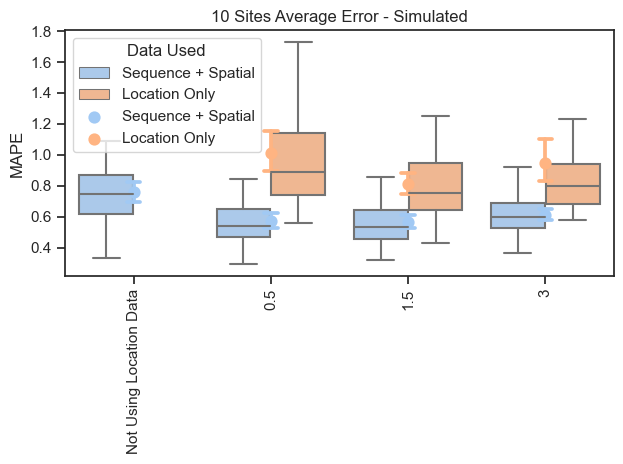

In [95]:
brlen_df = pd.read_csv('fully_simulated_gaussian_brlen_results.csv')
plot_simulated_seq_simulated_location_data(brlen_df, 'Simulated')

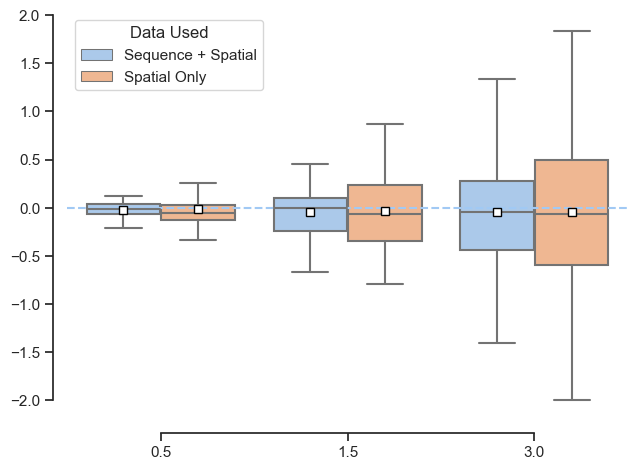

In [74]:
sigma_df = pd.read_csv('fully_simulated_gaussian_sigma_results.csv')
plot_sigmas_fully_simulated_data(sigma_df, 'Simulated')

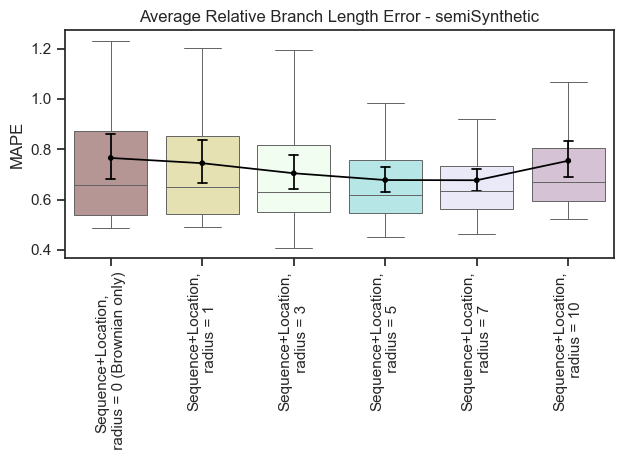

In [44]:
warnings.filterwarnings("ignore")

brlen_df = pd.read_csv('simulated_seq_real_loc_brlen_results.csv')
plot_brlens(brlen_df, 'semiSynthetic')

# to change between the radius plot and the different data types plot, set data_names = data_names_radius or data_names_modalities
# to set/remove the interpolating late, set join = True/False in the seaborn plot function

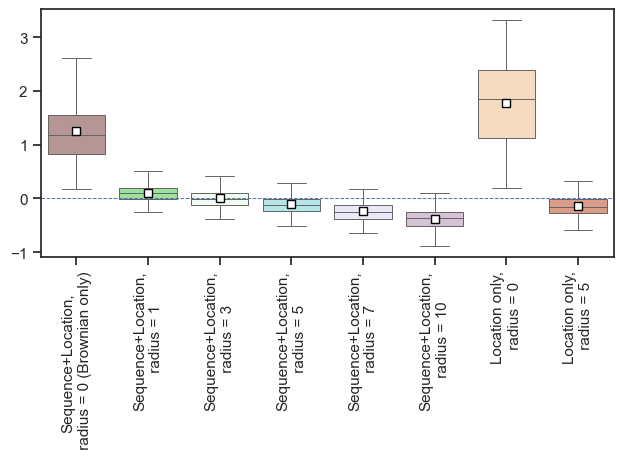

In [39]:
warnings.filterwarnings("ignore")
sigma_df = pd.read_csv('simulated_seq_real_loc_sigma_results.csv')
plot_sigmas(sigma_df,'semiSynthetic')

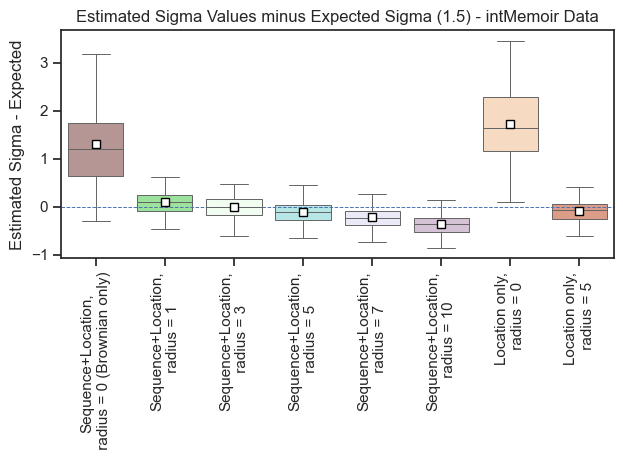

In [34]:
warnings.filterwarnings("ignore")
sigma_df = pd.read_csv('intmem_sigma_results.csv')
plot_sigmas(sigma_df,'intMemoir')

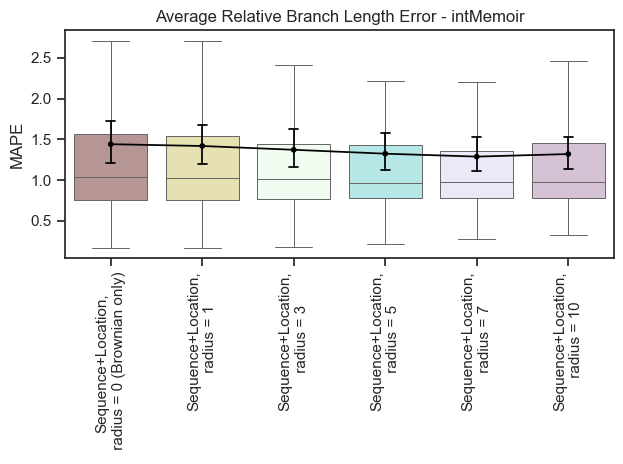

In [41]:
warnings.filterwarnings("ignore")
sigma_df = pd.read_csv('intmem_brlen_results.csv')
plot_brlens(sigma_df,'intMemoir')

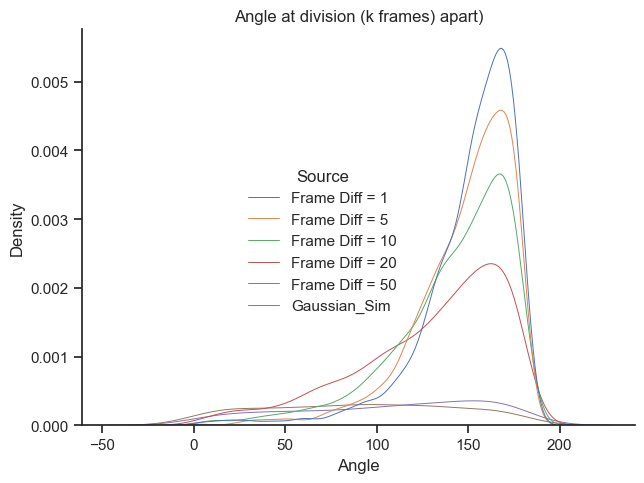

In [30]:
frame_diff_plotting()